<a href="https://colab.research.google.com/github/RohitAayushmaan/Cat_vs_dog_Prediction/blob/main/Predict_DogVsCat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!unzip train.zip
!unzip test.zip

Archive:  train.zip
   creating: train/cat/
  inflating: train/cat/cat.0.jpg     
  inflating: train/cat/cat.1.jpg     
  inflating: train/cat/cat.10.jpg    
  inflating: train/cat/cat.100.jpg   
  inflating: train/cat/cat.101.jpg   
  inflating: train/cat/cat.102.jpg   
  inflating: train/cat/cat.103.jpg   
  inflating: train/cat/cat.104.jpg   
  inflating: train/cat/cat.105.jpg   
  inflating: train/cat/cat.106.jpg   
  inflating: train/cat/cat.107.jpg   
  inflating: train/cat/cat.108.jpg   
  inflating: train/cat/cat.109.jpg   
  inflating: train/cat/cat.11.jpg    
  inflating: train/cat/cat.110.jpg   
  inflating: train/cat/cat.111.jpg   
  inflating: train/cat/cat.112.jpg   
  inflating: train/cat/cat.113.jpg   
  inflating: train/cat/cat.114.jpg   
  inflating: train/cat/cat.115.jpg   
  inflating: train/cat/cat.116.jpg   
  inflating: train/cat/cat.117.jpg   
  inflating: train/cat/cat.118.jpg   
  inflating: train/cat/cat.119.jpg   
  inflating: train/cat/cat.12.jpg    
  infl

Populating the interactive namespace from numpy and matplotlib


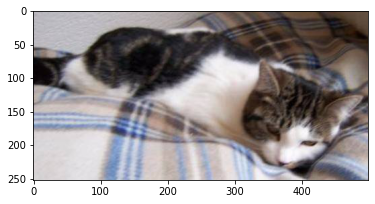

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('/content/test/cat/cat.153.jpg')
implot=plt.imshow(img)
plt.show()

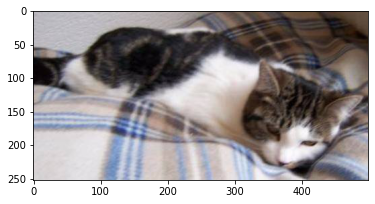

In [ ]:
imp=mpimg.imread('/content/test/dog/dog.12129.jpg')
implot=plt.imshow(img)
plt.show()


In [ ]:
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D,Flatten,Dropout,MaxPooling2D, Activation
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [ ]:
print(tensorflow.__version__)

2.8.2


In [ ]:
img_width,img_height=150,150
train_data_dir=r"/content/train"
validation_data_dir=r"/content/test"
nb_train_sample=100
nb_validation_samples=100
epochs=20
batch_size=20

In [27]:
import tensorflow.keras.backend as k
if k.image_data_format()=='channels_first':
  input_shape=(3,img_width,img_height)
else:
  input_shape=(img_width,img_height,3)


In [28]:
train_datagen=ImageDataGenerator(rescale=1. /255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=ImageDataGenerator(rescale=1. /255)
train_generator=train_datagen.flow_from_directory(train_data_dir,target_size=(img_width,img_height),batch_size=batch_size,class_mode='binary',classes=['cat','dog'])
validation_generator=test_datagen.flow_from_directory(validation_data_dir,target_size=(img_width,img_height),batch_size=batch_size,class_mode='binary')




Found 1030 images belonging to 2 classes.
Found 526 images belonging to 2 classes.


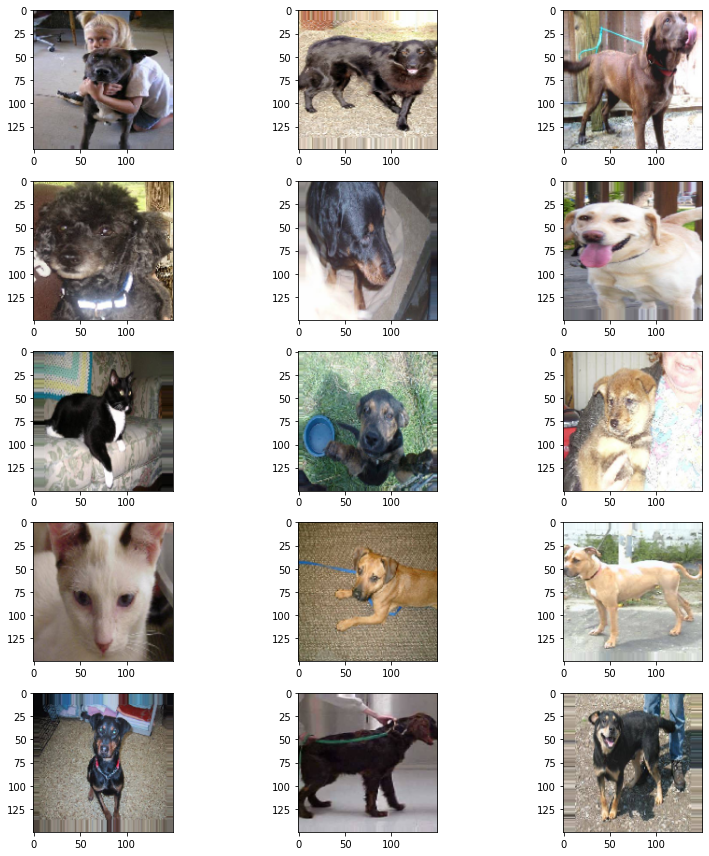

In [29]:
plt.figure(figsize=(12,12))
for i in range(0,15):
  plt.subplot(5,3,i+1)
  for x_batch,y_batch in train_generator:
    image=x_batch[0]
    plt.imshow(image)
    break;
plt.tight_layout()
plt.show()

In [30]:
model=Sequential()
model.add(Conv2D(64,(3,3),input_shape=input_shape))


model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(4,4)))

model.add(Flatten())
model.add(Dense(64))

model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 activation_3 (Activation)   (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 87616)             0         
                                                                 
 dense_2 (Dense)             (None, 64)                5607488   
                                                                 
 activation_4 (Activation)   (None, 64)                0         
                                                     

In [31]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 64)      1792      
                                                                 
 activation_3 (Activation)   (None, 148, 148, 64)      0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 64)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 87616)             0         
                                                                 
 dense_2 (Dense)             (None, 64)                5607488   
                                                                 
 activation_4 (Activation)   (None, 64)                0         
                                                     

In [39]:
training=model.fit_generator(train_generator,steps_per_epoch=nb_train_sample,
                             epochs=epochs,
                             validation_data=validation_generator,
                             validation_steps=nb_validation_samples)

Epoch 1/20


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  after removing the cwd from sys.path.


 52/100 [==============>...............] - ETA: 14s - loss: 0.4166 - accuracy: 0.8534

100/100 [==============================] - 18s 176ms/step - loss: 0.4166 - accuracy: 0.8534 - val_loss: 0.6336 - val_accuracy: 0.7167


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Unrecognized location 'uppor left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if __name__ == '__main__':


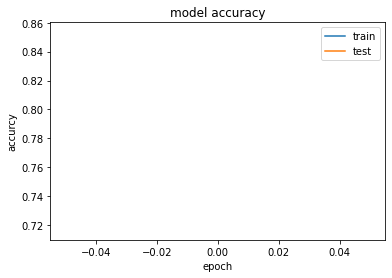

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Unrecognized location 'uppor left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  from ipykernel import kernelapp as app


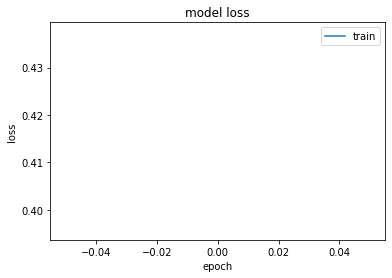

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline
print(training.history.keys())
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accurcy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='uppor left')
plt.show()
plt.plot(training.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='uppor left')
plt.show()

[[1.]]
Prediction Dog


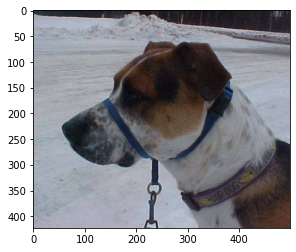

In [45]:
from tensorflow.keras.preprocessing import image
import numpy as np
img_pred=image.load_img("/content/test/dog/dog.12129.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred,axis=0)

rslt=model.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
  prediction="Dog"
else:
  prediction="Cat"
print('Prediction',prediction)
img=mpimg.imread('/content/test/dog/dog.12149.jpg')
imgplot=plt.imshow(img)
plt.show()